# 02_Data_Cleaning_and_EDA.ipynb

#### Main Goal: Clean data, handle missing & invalid values, and perform exploratory data analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Load the cleaned & merged dataset from Notebook 1

In [2]:
df = pd.read_parquet("data/cleaned/yellow_taxi_merged_2025.parquet")

##### Quick Overview of the Data

In [3]:
print("Shape of merged dataset:", df.shape)

Shape of merged dataset: (44417596, 20)


In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44417596 entries, 0 to 44417595
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee         

In [12]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,4.441760e+07,44417596,44417596,3.400118e+07,4.441760e+07,3.400118e+07,4.441760e+07,4.441760e+07,4.441760e+07,4.441760e+07,4.441760e+07,4.441760e+07,4.441760e+07,4.441760e+07,4.441760e+07,4.441760e+07,3.400118e+07,3.400118e+07,4.441760e+07
mean,1.858362e+00,2025-06-20 12:41:01.199241,2025-06-20 12:58:13.287383,1.293820e+00,6.833365e+00,3.081441e+00,1.614776e+02,1.611067e+02,9.434289e-01,1.805125e+01,1.173304e+00,4.772953e-01,2.843614e+00,4.975680e-01,9.504082e-01,2.652423e+01,2.184679e+00,1.449773e-01,5.296798e-01
min,1.000000e+00,2007-12-05 18:45:00,2007-12-05 19:02:00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.807600e+03,-1.739000e+01,-2.174000e+01,-3.333300e+02,-1.481700e+02,-1.000000e+00,-1.832850e+03,-2.500000e+00,-1.750000e+00,-7.500000e-01
25%,2.000000e+00,2025-03-31 09:40:22.750000,2025-03-31 09:56:14,1.000000e+00,1.040000e+00,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.554000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,2025-06-17 22:50:00.500000,2025-06-17 23:04:26.500000,1.000000e+00,1.850000e+00,1.000000e+00,1.610000e+02,1.620000e+02,1.000000e+00,1.350000e+01,0.000000e+00,5.000000e-01,2.020000e+00,0.000000e+00,1.000000e+00,2.105000e+01,2.500000e+00,0.000000e+00,7.500000e-01
75%,2.000000e+00,2025-09-13 17:23:34,2025-09-13 17:43:08.250000,1.000000e+00,3.690000e+00,1.000000e+00,2.320000e+02,2.330000e+02,1.000000e+00,2.215000e+01,2.500000e+00,5.000000e-01,3.980000e+00,0.000000e+00,1.000000e+00,3.024000e+01,2.500000e+00,0.000000e+00,7.500000e-01
max,7.000000e+00,2025-11-30 23:59:59,2025-12-01 21:41:00,9.000000e+00,3.979944e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,8.633721e+05,1.336000e+02,5.243380e+03,9.609400e+02,9.168700e+02,2.500000e+00,8.633804e+05,2.500000e+00,6.750000e+00,1.750000e+00
std,6.734303e-01,NaN,NaN,7.279109e-01,6.422717e+02,1.378747e+01,6.614842e+01,7.043204e+01,7.487771e-01,1.494756e+02,1.828036e+00,7.988280e-01,3.952829e+00,2.118004e+00,2.847436e-01,1.500865e+02,9.530851e-01,5.254590e-01,3.588513e-01


##### Check for missing values

In [5]:
missing_values = df.isna().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 VendorID                        0
tpep_pickup_datetime            0
tpep_dropoff_datetime           0
passenger_count          10416412
trip_distance                   0
RatecodeID               10416412
store_and_fwd_flag       10416412
PULocationID                    0
DOLocationID                    0
payment_type                    0
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
improvement_surcharge           0
total_amount                    0
congestion_surcharge     10416412
Airport_fee              10416412
cbd_congestion_fee              0
dtype: int64


In [6]:
# Example decision: fill or drop columns with too many missing values
# passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge, Airport_fee
# fill numeric with 0, categorical with 'N' (example)
df['passenger_count'] = df['passenger_count'].fillna(1)  # assume 1 passenger if missing
df['RatecodeID'] = df['RatecodeID'].fillna(1)
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)
df['Airport_fee'] = df['Airport_fee'].fillna(0)

##### Handle invalid / outlier values

In [7]:
# Check for negative or zero values in main columns
print("Rows with trip_distance <= 0:", df[df['trip_distance'] <= 0].shape)
print("Rows with total_amount <= 0:", df[df['total_amount'] <= 0].shape)
print("Rows with passenger_count <= 0:", df[df['passenger_count'] <= 0].shape)

Rows with trip_distance <= 0: (1250302, 20)
Rows with total_amount <= 0: (931032, 20)
Rows with passenger_count <= 0: (241235, 20)


In [39]:
# Trip Distance
distances = df['trip_distance']

# Detailed analysis of trip_distance
print("Trip Distance Distribution Analysis:")
print("-"*50)

for percentile in [0, 25, 50, 75, 90, 95, 99, 99.5, 99.9, 99.99, 100]:
    value = distances.quantile(percentile/100)
    print(f"{percentile}%: {value:.2f} miles")

print(f"\nMean: {distances.mean():.2f}")
print(f"Standard Deviation: {distances.std():.2f}")
print(f"Total Values: {len(distances):,}")

Trip Distance Distribution Analysis:
--------------------------------------------------
0%: 0.01 miles
25%: 1.10 miles
50%: 1.90 miles
75%: 3.77 miles
90%: 8.74 miles
95%: 12.91 miles
99%: 19.59 miles
99.5%: 21.43 miles
99.9%: 29.88 miles
99.99%: 64.84 miles
100%: 397994.37 miles

Mean: 7.05
Standard Deviation: 654.13
Total Values: 42,076,389


In [41]:
# Total Amount
amounts = df['total_amount']

# Detailed statistics
print("Total Amount Distribution Analysis:")
print("-"*50)

for percentile in [0, 25, 50, 75, 90, 95, 99, 99.5, 99.9, 99.99, 100]:
    value = amounts.quantile(percentile/100)
    print(f"{percentile}%: ${value:.2f}")

print(f"\nMean: ${amounts.mean():.2f}")
print(f"Standard Deviation: ${amounts.std():.2f}")
print(f"Total Values: {len(amounts):,}")


Total Amount Distribution Analysis:
--------------------------------------------------
0%: $0.01
25%: $16.00
50%: $21.39
75%: $30.53
90%: $50.46
95%: $77.14
99%: $103.89
99.5%: $114.45
99.9%: $173.25
99.99%: $339.00
100%: $863380.37

Mean: $27.64
Standard Deviation: $153.83
Total Values: 42,076,389


In [8]:
# Drop invalid rows
df = df[(df['trip_distance'] > 0) & 
        (df['total_amount'] > 0) & 
        (df['passenger_count'] > 0)]

In [9]:
# Remove extreme outliers based on 99.9 percentile
trip_distance_upper = df['trip_distance'].quantile(0.999)
total_amount_upper = df['total_amount'].quantile(0.999)

df = df[(df['trip_distance'] <= trip_distance_upper) & 
              (df['total_amount'] <= total_amount_upper)]

In [12]:
print("Shape after removing invalid rows:", df.shape)

Shape after removing invalid rows: (42018630, 24)


##### Add basic features for EDA

In [11]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_weekday'] = df['tpep_pickup_datetime'].dt.weekday
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_year'] = df['tpep_pickup_datetime'].dt.year

##### Distribution Analysis of Key Columns

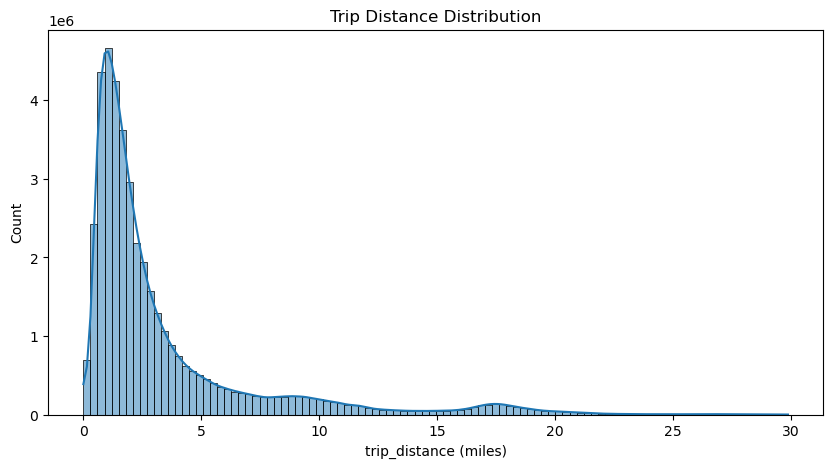

In [49]:
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=100, kde=True)
plt.title("Trip Distance Distribution")
plt.xlabel("trip_distance (miles)")
plt.show()

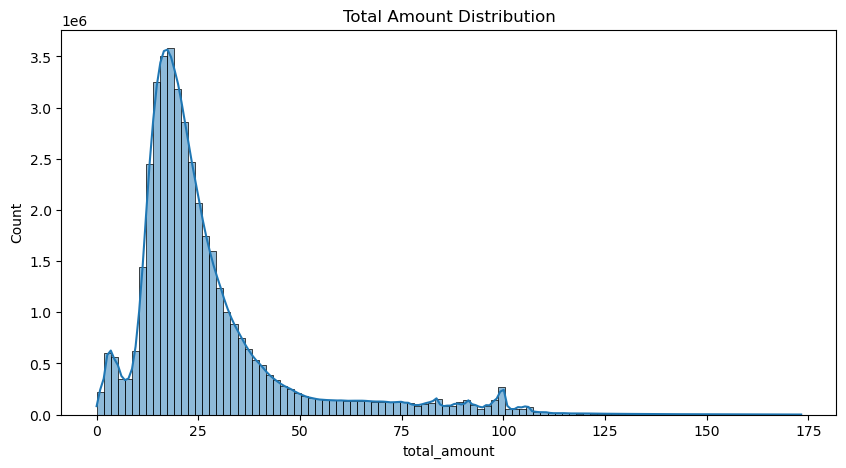

In [52]:
plt.figure(figsize=(10,5))
sns.histplot(df['total_amount'], bins=100, kde=True)
plt.title("Total Amount Distribution")
plt.show()

##### Time-based Analysis

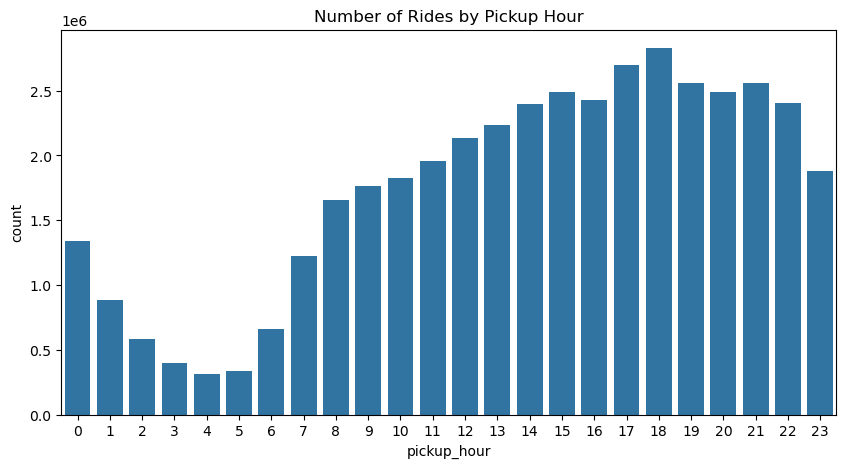

In [56]:
# Number of Rides by Pickup Hour
plt.figure(figsize=(10,5))
sns.countplot(x='pickup_hour', data=df)
plt.title("Number of Rides by Pickup Hour")
plt.show()

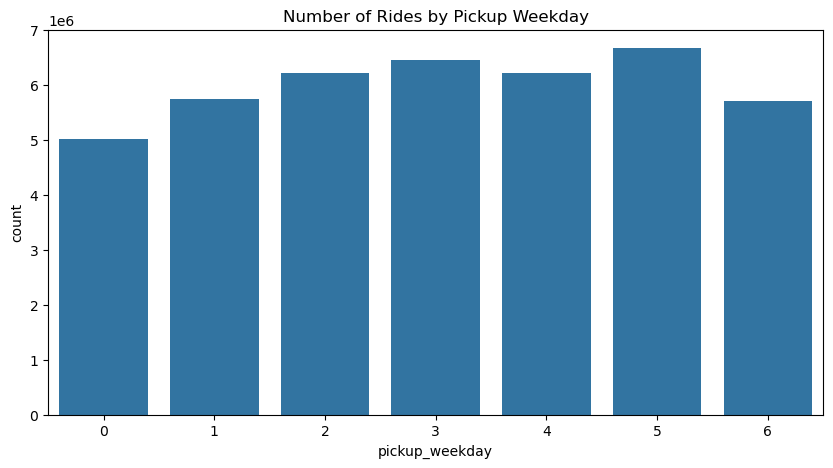

In [10]:
# Number of Rides by Pickup Weekday
plt.figure(figsize=(10,5))
sns.countplot(x='pickup_weekday', data=df)
plt.title("Number of Rides by Pickup Weekday")
plt.show()

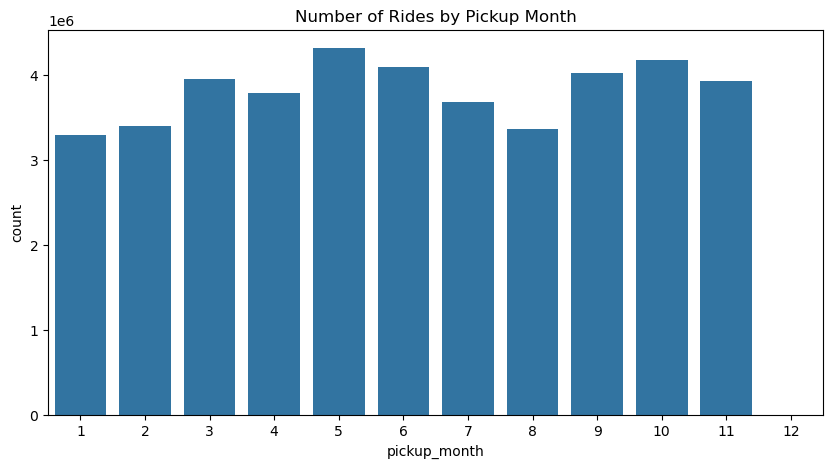

In [11]:
# Number of Rides by Pickup Month
plt.figure(figsize=(10,5))
sns.countplot(x='pickup_month', data=df)
plt.title("Number of Rides by Pickup Month")
plt.show()

##### Relationships Between Columns

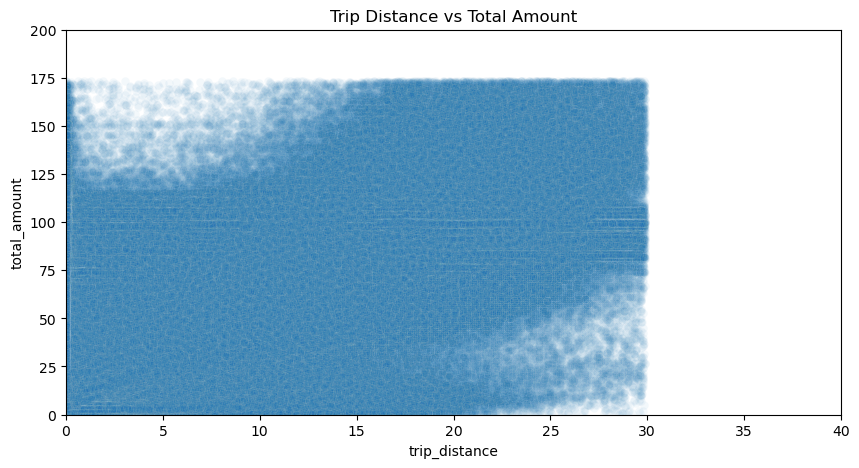

In [14]:
# Trip Distance vs Total Amount
plt.figure(figsize=(10,5))
sns.scatterplot(x='trip_distance', y='total_amount', data=df,alpha=0.05)
plt.xlim(0, 40)
plt.ylim(0, 200)
plt.title("Trip Distance vs Total Amount")
plt.show()

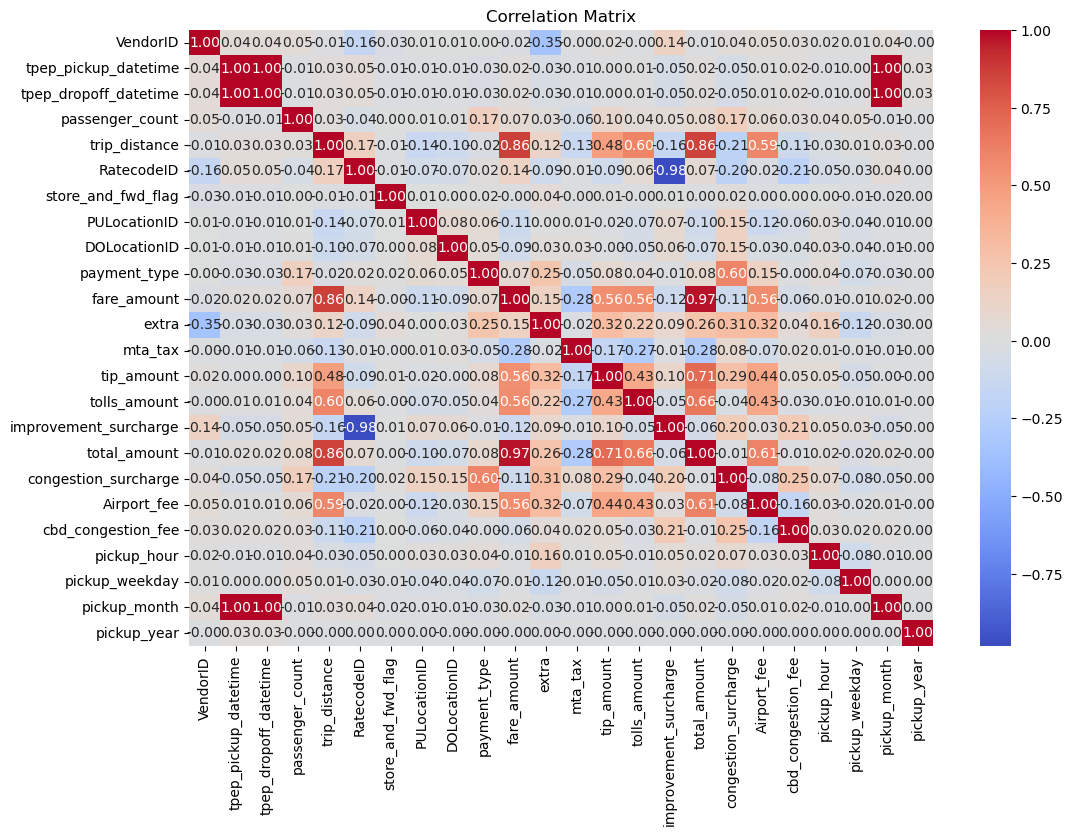

In [13]:
# Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

##### Save the final cleaned dataset

In [15]:
df.to_parquet("data/cleaned/yellow_taxi_clean_2025.parquet", index=False)
print("Cleaned dataset saved")

Cleaned dataset saved
